In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for clean visuals
sns.set(style="whitegrid", palette="pastel")

df= pd.read_csv("data/zomato.csv", encoding= "latin-1")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [2]:
cols = ["rate","online_order","book_table","location","rest_type",
        "cuisines","approx_cost(for two people)"]
df = df[cols].copy()
print(df.shape, df.isna().mean().sort_values(ascending=False).head(10))
df.head()
df.tail()

(51717, 7) rate                           0.150337
approx_cost(for two people)    0.006690
rest_type                      0.004389
cuisines                       0.000870
location                       0.000406
book_table                     0.000000
online_order                   0.000000
dtype: float64


,rate,online_order,book_table,location,rest_type,cuisines,approx_cost(for two people)
51712,3.6 /5,No,No,Whitefield,Bar,Continental,"1,500"
51713,NaN,No,No,Whitefield,Bar,Finger Food,600
51714,NaN,No,No,Whitefield,Bar,Finger Food,"2,000"
51715,4.3 /5,No,Yes,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500"
51716,3.4 /5,No,No,"ITPL Main Road, Whitefield","Bar, Casual Dining","Finger Food, North Indian, Continental","1,500"


In [3]:
df.describe()


,rate,online_order,book_table,location,rest_type,cuisines,approx_cost(for two people)
count,43942,51717,51717,51696,51490,51672,51371
unique,64,2,2,93,93,2723,70
top,NEW,Yes,No,BTM,Quick Bites,North Indian,300
freq,2208,30444,45268,5124,19132,2913,7576


In [4]:
df.isnull().sum().sort_values(ascending=False).head(7)


rate                           7775
approx_cost(for two people)     346
rest_type                       227
cuisines                         45
location                         21
book_table                        0
online_order                      0
dtype: int64

In [5]:
for col in ['online_order', 'book_table', 'location', 'rest_type', 'cuisines']:
    print(f"{col}: {df[col].nunique()} unique values")


online_order: 2 unique values
book_table: 2 unique values
location: 93 unique values
rest_type: 93 unique values
cuisines: 2723 unique values


In [6]:
df['rate'].value_counts().head(10)

# Check for weird symbols like 'NEW' or '-'
df['rate'].unique()[:10]


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5'], dtype=object)

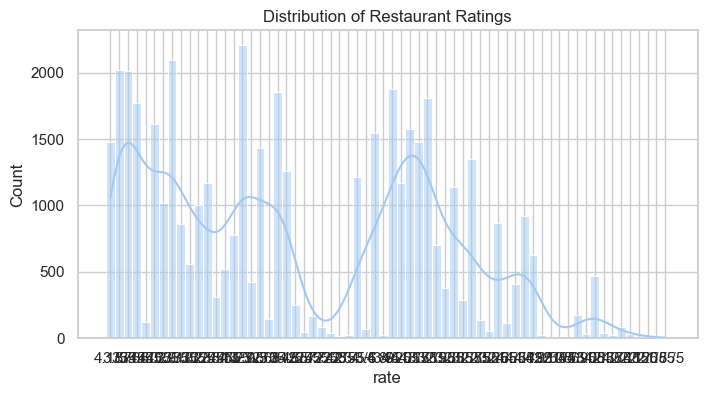

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(df['rate'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.show()


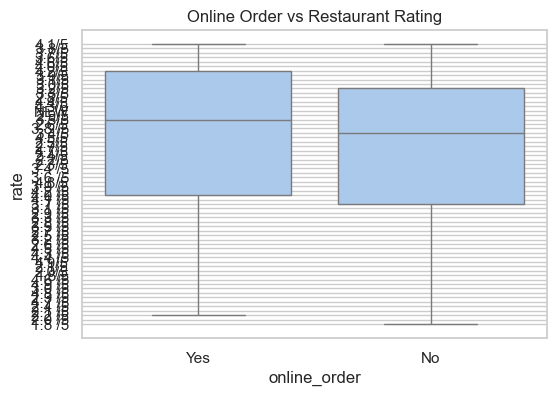

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Online Order vs Restaurant Rating')
plt.show()


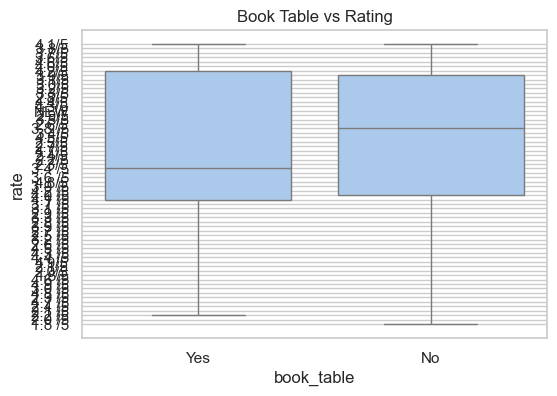

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x='book_table', y='rate', data=df)
plt.title('Book Table vs Rating')
plt.show()


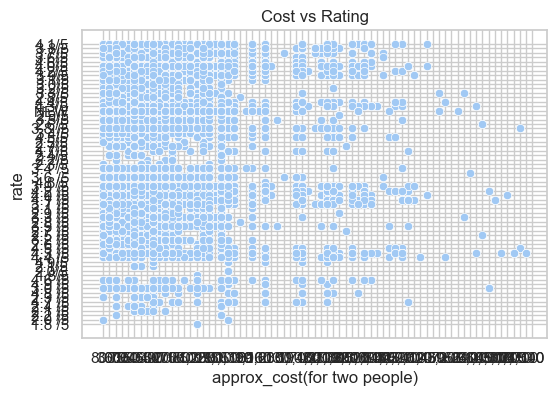

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df
               )
plt.title('Cost vs Rating')
plt.show()


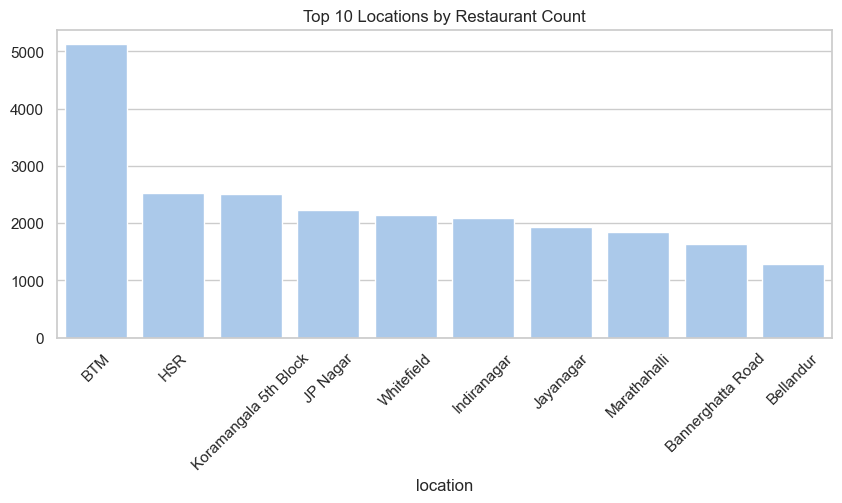

In [11]:
plt.figure(figsize=(10,4))
top_locations = df['location'].value_counts().head(10)
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.title('Top 10 Locations by Restaurant Count')
plt.xticks(rotation=45)
plt.show()


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rate                         43942 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   location                     51696 non-null  object
 4   rest_type                    51490 non-null  object
 5   cuisines                     51672 non-null  object
 6   approx_cost(for two people)  51371 non-null  object
dtypes: object(7)
memory usage: 2.8+ MB


In [13]:
# Example conversions
df['rate'] = df['rate'].astype(str).str.replace('/5', '').replace('NEW', np.nan).replace('-', np.nan).astype(float)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '').astype(float)


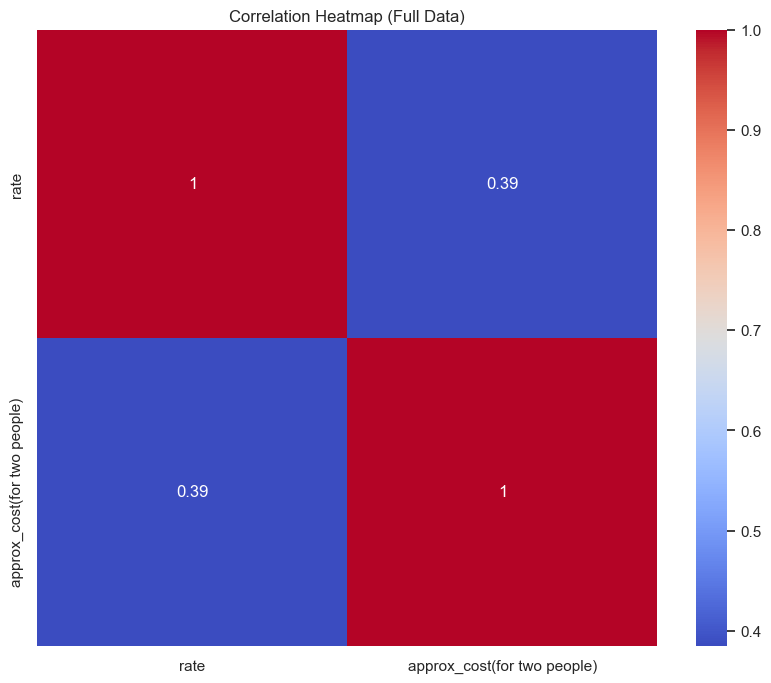

In [14]:
corr = df.corr(numeric_only=True)
if corr.empty:
    print("⚠️ No numeric columns available for correlation.")
else:
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap (Full Data)')
    plt.show()


In [15]:
import numpy as np

df = df.drop_duplicates()

# clean rating
def clean_rate(x):
    x = str(x).strip()
    if "/" in x:
        x = x.split("/")[0]
    return np.nan if x in ["NEW","-","nan"] else x

df["rate"] = df["rate"].map(clean_rate).astype(float)
df = df.dropna(subset=["rate"])

# clean cost
df["approx_cost(for two people)"] = (
    df["approx_cost(for two people)"].astype(str).str.replace(",", "").astype(float)
)

# optional: downcase & trim categorical text
for c in ["location","rest_type","cuisines"]:
    df[c] = df[c].astype(str).str.strip().str.lower()


location
btm               0.064840
whitefield        0.061495
indiranagar       0.055238
hsr               0.052001
marathahalli      0.051893
                    ...   
west bangalore    0.000216
yelahanka         0.000216
langford town     0.000108
peenya            0.000108
nagarbhavi        0.000108
Name: proportion, Length: 92, dtype: float64


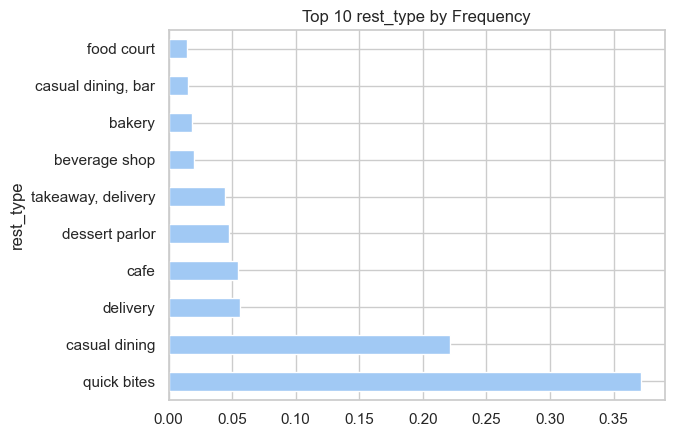

In [16]:
from sklearn.model_selection import train_test_split

# split early to avoid leakage
train, test = train_test_split(df, test_size=0.2, random_state=42)

# binary map
for c in ["online_order","book_table"]:
    train[c] = train[c].map({"yes":1,"no":0}).fillna(0).astype(int)
    test[c]  = test[c].map({"yes":1,"no":0}).fillna(0).astype(int)
    freq = train["location"].value_counts(normalize=True)
print(freq)

    

# frequency encoding for location/rest_type (stable, leakage-safe)
for c in ["location","rest_type"]:
    freq = train[c].value_counts(normalize=True)
    train[c+"_freq"] = train[c].map(freq).fillna(0)
    test[c+"_freq"]  = test[c].map(freq).fillna(0)

# cuisines: top-K multi-hot
K = 30
from collections import Counter
def split_cuisines(s): return [x.strip() for x in str(s).split(",") if x.strip()]
topk = [c for c,_ in Counter(
    cuisine for row in train["cuisines"].dropna().map(split_cuisines) for cuisine in row
).most_common(K)]

for cu in topk:
    train[f"cuisine__{cu}"] = train["cuisines"].map(lambda r: int(cu in split_cuisines(r)))
    test[f"cuisine__{cu}"]  = test["cuisines"].map(lambda r: int(cu in split_cuisines(r)))

# skewed cost: log1p
train["cost_log"] = np.log1p(train["approx_cost(for two people)"])
test["cost_log"]  = np.log1p(test["approx_cost(for two people)"])

# final feature list
feature_cols = ["online_order","book_table","location_freq","rest_type_freq","cost_log"] \
               + [c for c in train.columns if c.startswith("cuisine__")]

X_train, y_train = train[feature_cols], train["rate"]
X_test,  y_test  = test[feature_cols],  test["rate"]
freq.head(10).plot(kind='barh', title=f"Top 10 {c} by Frequency")
plt.show()


In [17]:

print(topk)


['north indian', 'chinese', 'fast food', 'south indian', 'biryani', 'desserts', 'beverages', 'continental', 'cafe', 'street food', 'italian', 'bakery', 'pizza', 'burger', 'ice cream', 'andhra', 'seafood', 'mughlai', 'rolls', 'kerala', 'momos', 'arabian', 'american', 'mithai', 'asian', 'juices', 'sandwich', 'salad', 'kebab', 'thai']


In [18]:

mean_train_rating = y_train.mean()

# Create baseline predictions (all same value)
yhat_mean = np.full_like(y_test, fill_value=mean_train_rating, dtype=float)

# Compute RMSE
baseline_rmse = ((yhat_mean - y_test)**2).mean()**0.5
print("Baseline RMSE:", baseline_rmse)


Baseline RMSE: 0.43707306369500865


In [19]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor

cv = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(n_estimators=300, max_depth=None, random_state=42, n_jobs=4)
cv_rmse = (-1*cross_val_score(rf, X_train, y_train, cv=cv, scoring="neg_root_mean_squared_error")).mean()
rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=4)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    rf, X_train, y_train,
    cv=cv,
    scoring='neg_root_mean_squared_error'
)
print("Each fold RMSE:", -scores)
print("Average RMSE:", -scores.mean())

Each fold RMSE: [0.36202963 0.36818341 0.36190733 0.36327425 0.35924468]
Average RMSE: 0.3629278604565567


In [21]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor

param_dist = {
    "n_estimators": [100, 200, 300],         
    "max_depth": [None, 8, 12, 16],           
    "min_samples_split": [2, 5],              
    "min_samples_leaf": [1, 2]               
}


cv = KFold(n_splits=3, shuffle=True, random_state=42)

# ⚡ Use fewer random combinations (n_iter=8)
search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=2),  # limit CPU threads
    param_distributions=param_dist,
    n_iter=8,          # 8 instead of 20 -> 2.5x faster
    cv=cv,             # 3 folds instead of 5
    scoring="neg_root_mean_squared_error",
    random_state=42,
    verbose=2          # optional: shows progress
)

# 🏃 Fit the search
search.fit(X_train, y_train)

# ✅ Extract best model
best_model = search.best_estimator_
print("Best params:", search.best_params_)
print("Best RMSE:", -search.best_score_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.8s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.6s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.7s
[CV] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.6s
[CV] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.4s
[CV] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.5s
[CV] END max_depth=16, min_samp

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

y_pred = best_model.predict(X_test)

# Compute metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")


RMSE: 0.3592
MAE:  0.2775
R²:   0.3246
